In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

from dtree import Classifier, MyClassifier
from bagging import Bagger,prepare

In [3]:
df = prepare()
X = df.drop('y', axis=1)
y = df['y'].values

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3810/3810 [00:20<00:00, 186.77it/s]


In [4]:
X = StandardScaler().fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
my_forest = Bagger(MyClassifier, random_state=1, max_depth=4)

In [7]:
my_forest.fit(X_train, y_train)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [04:29<00:00,  2.69s/it]


In [8]:
predicts = my_forest.predict(X_test)
precision, recall, f_score, _ = precision_recall_fscore_support(y_test, predicts)

(762, 9)


Accuracy: 0.5538057742782152
Precision on class 0: 0.5263157894736842
Recall on class 0: 0.2564102564102564
F1-score on class 0: 0.3448275862068966


Precision on class 1: 0.5186915887850467
Recall on class 1: 0.7207792207792207
F1-score on class 1: 0.6032608695652174


Precision on class 2: 0.5116279069767442
Recall on class 2: 0.26506024096385544
F1-score on class 2: 0.3492063492063492


Precision on class 3: 0.3333333333333333
Recall on class 3: 0.2
F1-score on class 3: 0.25


Precision on class 4: 0.9393939393939394
Recall on class 4: 0.4492753623188406
F1-score on class 4: 0.6078431372549019


Precision on class 5: 0.5548780487804879
Recall on class 5: 0.7109375
F1-score on class 5: 0.6232876712328768


Precision on class 6: 0.4262295081967213
Recall on class 6: 0.5098039215686274
F1-score on class 6: 0.4642857142857143


Precision on class 7: 0.5144927536231884
Recall on class 7: 0.7395833333333334
F1-score on class 7: 0.6068376068376068


Precision on class 8: 0.6781609195402298

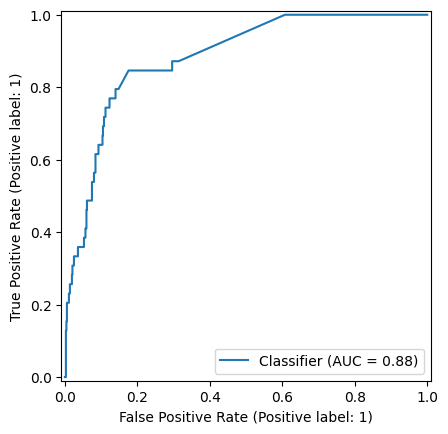

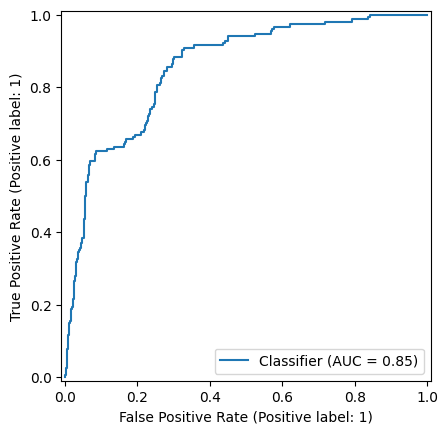

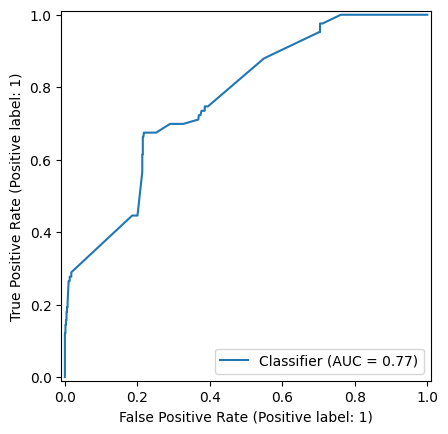

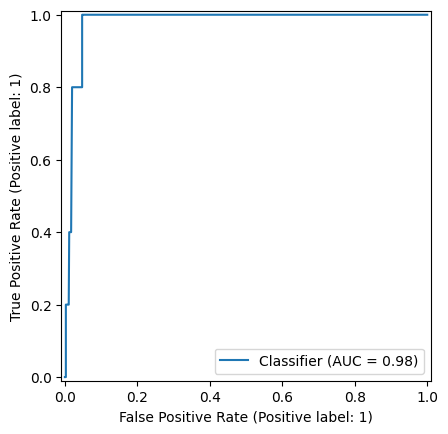

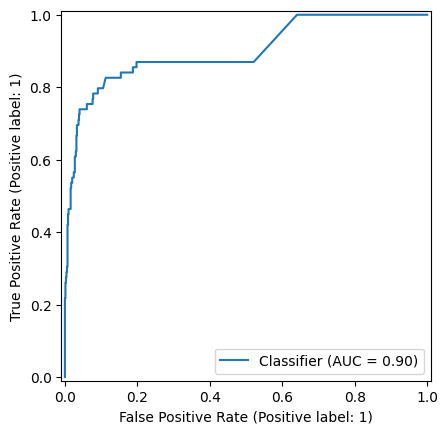

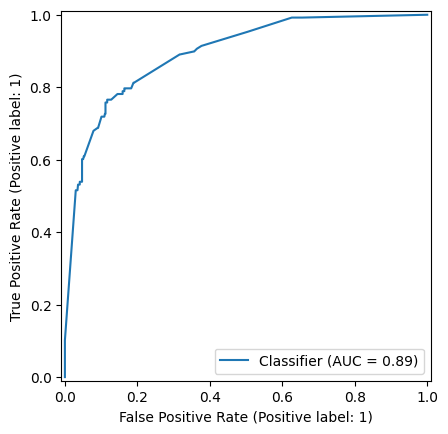

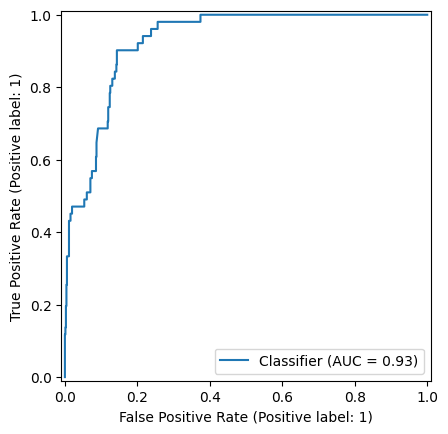

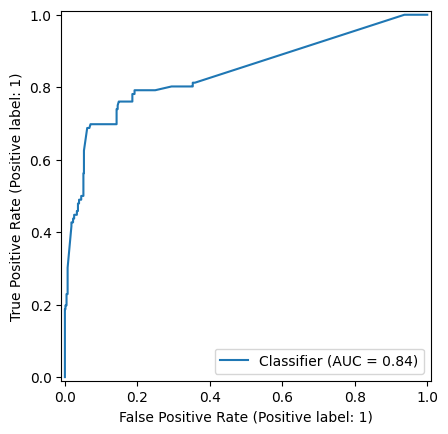

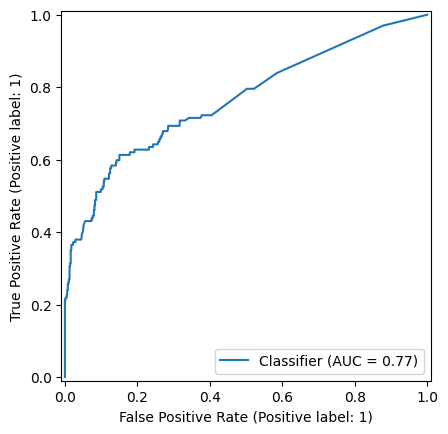

In [9]:
print('Accuracy:', accuracy_score(y_test, predicts))
for i,_ in enumerate(precision):
    print(f'Precision on class {i}: {precision[i]}')
    print(f'Recall on class {i}: {recall[i]}')
    print(f'F1-score on class {i}: {f_score[i]}')
    print('\n')
    probas = my_forest.predict_proba(X_test)
    RocCurveDisplay.from_predictions(np.eye(np.unique(y_test).shape[0])[y_test][:,i], probas[:,i])
    plt.show